Author: Brian Ngo
Date: 11/16/2024

In [ ]:
import pandas as pd

In [ ]:
teams = pd.read_csv("https://raw.githubusercontent.com/Beusted/Olympic-Medal-Prediction/refs/heads/main/teams.csv")

In [ ]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [ ]:
# removes from view: events, height, weight, and prev_3_medals

teams = teams [['team', 'country', 'year', 'athletes', 'age', 'prev_medals', 'medals']]

In [ ]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [ ]:
# attempting to look at correlations between medal count and other categories

teams.corr()['medals']

ValueError: could not convert string to float: 'AFG'

In [ ]:
# previous code received error, looking at dtypes of all categories to see where the problem lies. Observe that 'team' and 'country' are object type.

print(teams.dtypes)

team            object
country         object
year             int64
athletes         int64
age            float64
prev_medals    float64
medals           int64
dtype: object


In [ ]:
# selecting only numeric dtypes when viewing correlations between medal count and other categories

print(teams.select_dtypes(include=['number']).corr()["medals"])

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64


In [ ]:
# using seaborn as our graphic visualizer

import seaborn as sns

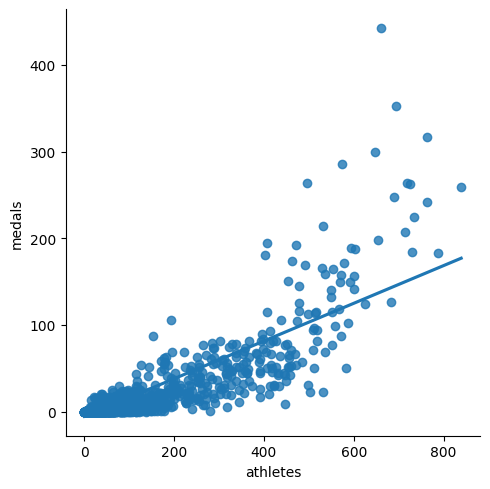

In [ ]:
# visual representation of correlation between medal count and athletes.
# using fit_reg to fit regression line and ci=None to not show confidence interval

sns.lmplot(x= "athletes", y = "medals", data = teams, fit_reg = True, ci = None)

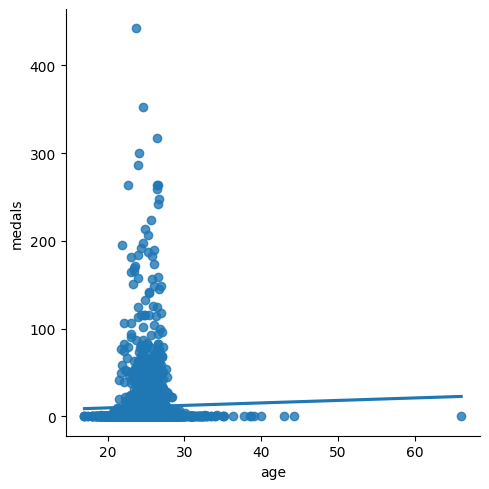

In [ ]:
# viewing age to see another regression line

sns.lmplot(x= "age", y = "medals", data = teams, fit_reg = True, ci = None)

<Axes: ylabel='Frequency'>

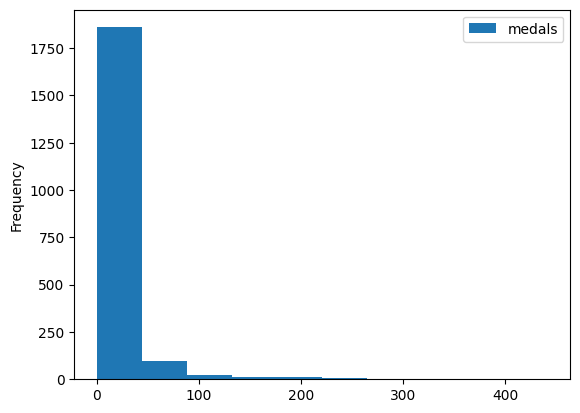

In [ ]:
# histogram to look at how many countries fall into each bin for how many medals they won

teams.plot.hist(y='medals')

In [ ]:
# checks ANY values within axis 1 (rows) for null values (missing values)

teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals


In [ ]:
# drop those null rows

teams = teams.dropna()

In [ ]:
# splitting data into training and testing sets, these sets will be 80/20%.

train = teams[teams['year'] < 2012].copy()
test = teams[teams['year'] >= 2012].copy()

In [ ]:
train.shape

(1609, 7)

In [ ]:
test.shape

(405, 7)

In [ ]:
# using scikit-learn for linear regression built-in algorithms

from sklearn.linear_model import LinearRegression


reg = LinearRegression()

In [ ]:
# training the linear regression model with the predictors athletes and previous medals, to find the target, medals.

predictors = ['athletes', 'prev_medals']
target = 'medals'

In [ ]:
# fit(x, y): x being the input data and y being the target data

reg.fit(train[predictors], train['medals'])

LinearRegression()

In [ ]:
# .predict(x), x being the input data to create predictions

predictions = reg.predict(test[predictors])

In [ ]:
# adding new column 'predictions' into the test df

test['predictions'] = predictions

In [ ]:
test.head()

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629


In [ ]:
# can't take away a countries medals nor can a country get half a medal haha, so we are manually correcting the predictions to show rounded, absolute values

test.loc[test['predictions'] < 0, 'predictions'] = 0
test['predictions'] = test['predictions'].round()

In [ ]:
# using MEA to evaluate the performance of the regmodel
# finding MEA by getting the difference between the actual medal count and predicted medal count

from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(test['medals'], test['predictions'])

In [ ]:
error

3.2987654320987656

In [ ]:
# quick check that mea is below std

teams.describe()['medals']

,medals
count,2014.000000
mean,10.990070
std,33.627528
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,442.000000


In [ ]:
# adding difference column showcasing difference between medals and predictions
errors = abs(test['medals'] - test['predictions'])
test['errors'] = errors

In [ ]:
test[test['team'] == 'USA']

,team,country,year,athletes,age,prev_medals,medals,predictions,errors
2053,USA,United States,2012,689,26.7,317.0,248,285.0,37.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0,28.0


In [ ]:
test[test['team'] == 'IND']

,team,country,year,athletes,age,prev_medals,medals,predictions,errors
907,IND,India,2012,95,26.0,3.0,6,7.0,1.0
908,IND,India,2016,130,26.1,6.0,2,12.0,10.0


In [ ]:
#  how many meadls off we were on average for each country. groupby will create a separate group for each team, and will calculate the mean

error_by_team = errors.groupby(test['team']).mean()

In [ ]:
error_by_team

,0
team,
AFG,0.5
ALB,0.0
ALG,1.5
AND,0.0
ANG,0.0
...,...
VIE,1.0
VIN,0.0
YEM,0.0


In [ ]:
# calculating how many medals each country earned on average

medals_by_team = test['medals'].groupby(test['team']).mean()

In [ ]:
# find the ratio between the errors

error_ratio = error_by_team / medals_by_team

In [ ]:
error_ratio

,0
team,
AFG,1.0
ALB,NaN
ALG,1.0
AND,NaN
ANG,NaN
...,...
VIE,1.0
VIN,NaN
YEM,NaN


In [ ]:
# using bitwise negation, tilde ('~') operator to switch booleans
# removing null values

error_ratio[pd.notnull(error_ratio)]

,0
team,
AFG,1.000000
ALG,1.000000
ARG,0.853659
ARM,0.428571
AUS,0.367347
...,...
USA,0.126953
UZB,0.625000
VEN,1.750000


In [ ]:
# handling infinite values that come from the medals_by_team (in the error_ratio equation) equaling to zero (e.g. 1 / 0 = inf)

import numpy as np

error_ratio = error_ratio[np.isfinite(error_ratio)]

In [ ]:
error_ratio

,0
team,
AFG,1.000000
ALG,1.000000
ARG,0.853659
ARM,0.428571
AUS,0.367347
...,...
UKR,0.951220
USA,0.126953
UZB,0.625000


<Axes: ylabel='Frequency'>

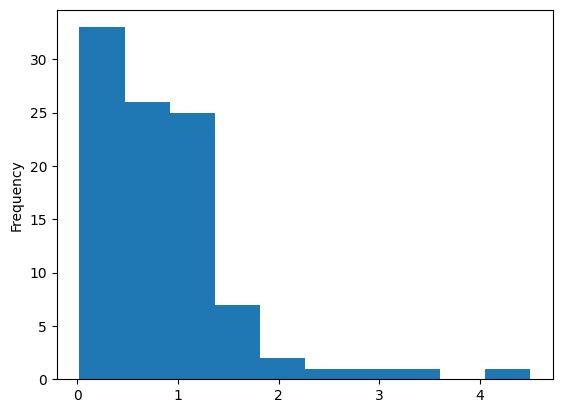

In [ ]:
error_ratio.plot.hist()

In [ ]:
error_ratio.sort_values()

,0
team,
FRA,0.022472
CAN,0.048387
NZL,0.063492
RUS,0.082353
ITA,0.121429
...,...
MAR,2.000000
EGY,2.400000
HKG,3.000000


In [ ]:
# add in more predictors
# try different models

In [ ]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions,errors
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0,1.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0,2.0


In [ ]:
new_predictions = test['predictions']

<Axes: xlabel='athletes', ylabel='medals'>

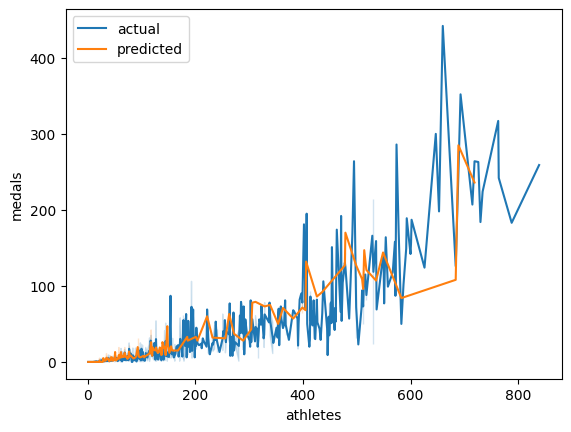

In [ ]:
sns.lineplot(x='athletes', y='medals', data = teams, label='actual')
sns.lineplot(x='athletes', y='predictions', data = test, label='predicted')